In [1]:
# Setup
import matplotlib as plt
import numpy as np
from dolo import *
import dolo.algos.perfect_foresight as pf
import dolo.algos.value_iteration as vi
import pandas as pd

In [2]:
# Load and calibrate the model model
model = yaml_import("Q_model.yaml")

alpha = 0.33
delta = 0.05
omega = 2

model.set_calibration(alpha = alpha, delta = delta, omega = omega)

    calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


	> 1 | 0.14048691858940288 | 0
	> 2 | 0.06460775851779599 | 0
	> 3 | 0.024781666464991914 | 0
	> 4 | 0.006098598442334735 | 0
	> 5 | 0.0005015538028684263 | 0
	> 6 | 3.3992652868075623e-06 | 0
	> 7 | 1.1628986662515217e-10 | 0
> System was solved after iteration 7. Residual=1.1628986662515217e-10


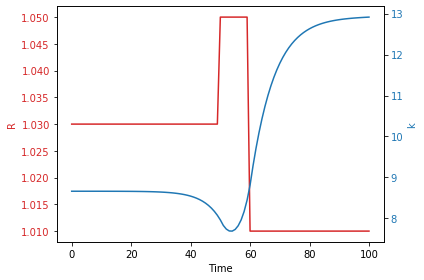

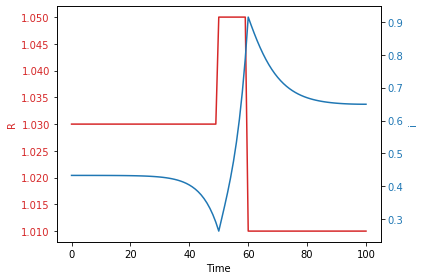

In [3]:
# Interest rate simulation

# Create empty dataframe for exog. variables
exog = pd.DataFrame(columns = ['R','tau','itc_1'])

# Generate an interest rate process
exog.R = np.concatenate((np.repeat(1.03,50),
                    np.repeat(1.05,10),
                    np.repeat(1.01,20)))

# Leave tau at 0
exog.tau = 0
# Leave itc at 0
exog.itc_1 = 0

# Simpulate the optimal response
dr = pf.deterministic_solve(model = model,shocks = exog,verbose=True)

# Plot the results
ex = 'R'
vars = ['k','i']

for var in vars:
    
    fig, ax1 = plt.pyplot.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel(ex, color=color)
    ax1.plot(dr[ex], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(var, color=color)  # we already handled the x-label with ax1
    ax2.plot(dr[var], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.pyplot.show()

	> 1 | 0.13289022706129228 | 0
	> 2 | 0.05903203062284623 | 0
	> 3 | 0.02093932946849164 | 0
	> 4 | 0.00427858395773173 | 0
	> 5 | 0.00022679630459410127 | 0
	> 6 | 6.034090782591761e-07 | 0
> System was solved after iteration 6. Residual=6.034090782591761e-07


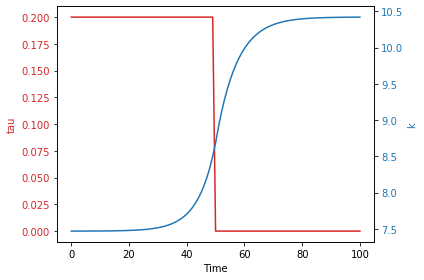

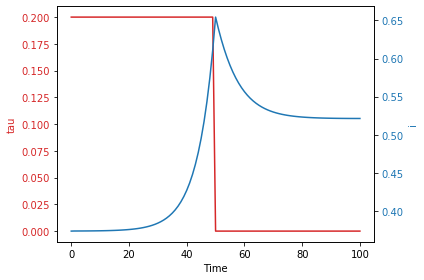

In [4]:
# Tax rate simulation

# Create empty dataframe for exog. variables
exog = pd.DataFrame(columns = ['R','tau','itc_1'])

# Generate a future tax cut dynamic
exog.tau = np.concatenate((np.repeat(0.2,50),
                           np.repeat(0,50)))

# Leave R at 1.02
exog.R = 1.02
# Leave itc at 0
exog.itc_1 = 0

# Simpulate the optimal response
dr = pf.deterministic_solve(model = model,shocks = exog,verbose=True)

# Plot the results
ex = 'tau'
vars = ['k','i']

for var in vars:
    
    fig, ax1 = plt.pyplot.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel(ex, color=color)
    ax1.plot(dr[ex], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(var, color=color)  # we already handled the x-label with ax1
    ax2.plot(dr[var], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.pyplot.show()

	> 1 | 0.14653836000902987 | 0
	> 2 | 0.06931619602121619 | 0
	> 3 | 0.02830189243998582 | 0
	> 4 | 0.008056410970118999 | 0
	> 5 | 0.0009314297368322455 | 0
	> 6 | 1.3132741325638797e-05 | 0
	> 7 | 2.203006665979501e-09 | 0
> System was solved after iteration 7. Residual=2.203006665979501e-09


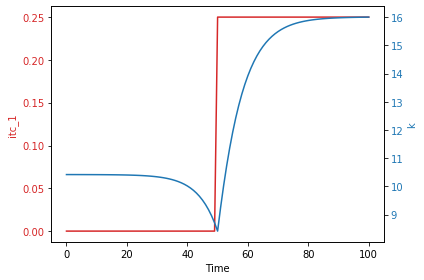

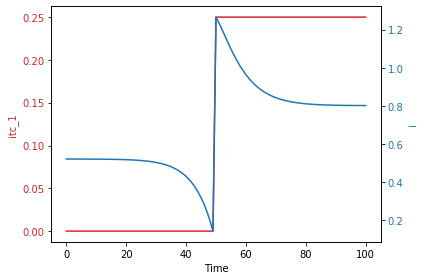

In [5]:
# ITC simulation

# Create empty dataframe for exog. variables
exog = pd.DataFrame(columns = ['R','tau','itc_1'])

# Generate a future itc increase cut dynamic
exog.itc_1 = np.concatenate((np.repeat(0,50),
                           np.repeat(0.25,50)))

# Leave R at 1.02
exog.R = 1.02
# Leave tau at 0
exog.tau = 0

# Simpulate the optimal response
dr = pf.deterministic_solve(model = model,shocks = exog,verbose=True)

# Plot the results
ex = 'itc_1'
vars = ['k','i']

for var in vars:
    
    fig, ax1 = plt.pyplot.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel(ex, color=color)
    ax1.plot(dr[ex], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(var, color=color)  # we already handled the x-label with ax1
    ax2.plot(dr[var], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.pyplot.show()